In [1]:
%matplotlib inline
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc
import matplotlib.pylab as plt


In [2]:
owner_df = pd.read_csv('ownerExample.csv')
owner_df.head()
class_names = ['nonowner', 'owner']

In [3]:
owner_df

,Class,Probability
0,owner,0.9959
1,owner,0.9875
2,owner,0.9844
3,owner,0.9804
4,owner,0.9481
5,owner,0.8892
6,owner,0.8476
7,nonowner,0.7628
8,owner,0.7069
9,owner,0.6807


In [4]:
owner_df['predicted'] = ['owner' if p > 0.5 else 'nonowner' for p in owner_df.Probability]

In [5]:
owner_df

,Class,Probability,predicted
0,owner,0.9959,owner
1,owner,0.9875,owner
2,owner,0.9844,owner
3,owner,0.9804,owner
4,owner,0.9481,owner
5,owner,0.8892,owner
6,owner,0.8476,owner
7,nonowner,0.7628,owner
8,owner,0.7069,owner
9,owner,0.6807,owner


In [6]:
print(confusion_matrix(owner_df.Class, owner_df.predicted))

[[10  2]
 [ 1 11]]


In [7]:
accuracy_score(owner_df.Class, owner_df.predicted)

0.875

In [8]:
print(classification_report(owner_df.Class,owner_df.predicted))

              precision    recall  f1-score   support

    nonowner       0.91      0.83      0.87        12
       owner       0.85      0.92      0.88        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



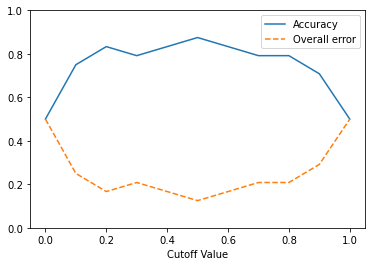

In [11]:
df = pd.read_csv('liftexample.csv')

cutoffs = [i * 0.1 for i in range(0, 11)]
accT = []
for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in df.prob]
    accT.append(accuracy_score(df.actual, predicted))

line_accuracy = plt.plot(cutoffs, accT, '-', label='Accuracy')[0]
line_error = plt.plot(cutoffs, [1 - acc for acc in accT], '--', label='Overall error')[0]
plt.ylim([0,1])
plt.xlabel('Cutoff Value')
plt.legend(handles=[line_accuracy, line_error])

plt.show()

In [12]:
df

,prob,actual
0,0.995,1
1,0.998,1
2,0.985,1
3,0.980,1
4,0.948,1
5,0.889,1
6,0.847,1
7,0.762,0
8,0.706,1
9,0.680,1


In [13]:
fpr, tpr, _ = roc_curve(df.actual, df.prob)
roc_auc = auc(fpr, tpr)

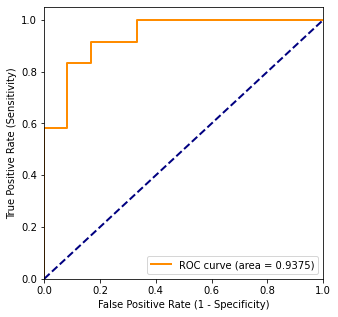

In [14]:
plt.figure(figsize=[5, 5])
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

plt.show()